In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

from statsmodels.formula.api import ols
print("Success")

Success


## Exercises

Create a new notebook or Python script named `evaluate`.

### Evaluating simple linear regressions on lemonade data with other features:
1. Create a dataframe from the csv at 
`https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv`
2. Make a baseline for predicting `sales`. (The mean is a good baseline)
3. Create a new dataframe to hold residuals. 
4. Calculate the baseline residuals. 
5. Use `ols` from `statsmodels` to create a simple linear regression (1 independent variable, 1 dependent variable) to predict `sales` using `flyers`.

```python
# the df variable is lemonade data

model = ols('sales ~ flyers', data=df).fit()
predictions = model.predict(df.x)
```

6. Use the `.predict` method from `ols` to produce all of our predictions. Add these predictions to the data

7. Calculate that model's residuals. 
8. Evaluate that model's performance and answer if the model is significant.
9. Evaluate that model's performance and answer if the feature is significant. 

### Repetition Improves Performance!
- In the next section of your notebook, perform the steps above with the `rainfall` column as the model's feature. Does this model beat the baseline? Would you prefer the `rainfall` model over the `flyers` model?
- In the next section of your notebook, perform the steps above with the `log_rainfall` column as the model's feature. Does this model beat the baseline? Would you prefer the `log_rainfall` model over the `flyers` model? Would you prefer the model built with `log_rainfall` over the `rainfall` model from before?
- In the next section of your notebook, perform the steps above with the `temperature` column as the model's only feature. Does this model beat the baseline? Would you prefer the `rainfall`, `log_rainfall`, or the `flyers` model?
- Which of these 4 single regression models would you want to move forward with?

### Tips dataset
1. Load the `tips` dataset from `pydataset` or `seaborn`
2. Define your baseline for "tip". Our goal will be to see if we can make a model that is better than baseline for predicting tips on total_bill.
3. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.
Here is some sample code to get you started:

```python
from statsmodels.formula.api import ols
from pydataset import data

df = data("tips")

model = ols('tip ~ total_bill', data=df).fit()
predictions = model.predict(df.x)
```
4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model significantly better than the baseline model?

9. Plot the residuals for the linear regression model that you made.

In [23]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


# Flyers

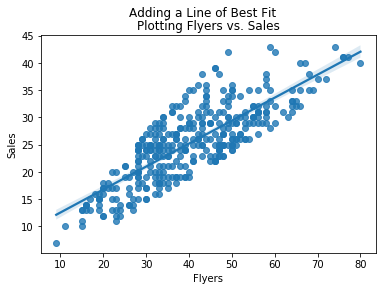

In [24]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Flyers vs. Sales")
sns.regplot(x="Flyers", y="Sales", data=df)
plt.show()

In [25]:
baseline = df.Sales.mean()

from statsmodels.formula.api import ols

model = ols('Sales ~ Flyers', df).fit()

# Pre-requisite Part 3 - Calculate residuals
evaluate = pd.DataFrame()

evaluate["x"] = df.Flyers

# Our y is our dependent variable
evaluate["y"] = df.Sales
evaluate["baseline"] = df.Sales.mean()

# y-hat is shorthand for "predicted y" values
evaluate["yhat"] = model.predict()

# Calculate the baseline residuals 
evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

# Calculate the model residuals
evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,15,10,25.323288,14.673754,15.323288,4.673754
1,15,13,25.323288,14.673754,12.323288,1.673754
2,27,15,25.323288,19.727926,10.323288,4.727926
3,28,17,25.323288,20.149107,8.323288,3.149107
4,33,18,25.323288,22.255013,7.323288,4.255013


In [26]:
# Calculate if the model beats the baseline
baseline_sse = ((evaluate.baseline_residual**2).sum())
model_sse = ((evaluate.model_residual**2).sum())

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

Our model beats the baseline
It makes sense to evaluate this model more deeply.


In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

metrics = pd.DataFrame()

# Sum the squares of the baseline errors
model_sse = ((evaluate.model_residual**2).sum())

# Take the average of the Sum of squared errors
# mse = model_sse / len(evaluate)

# Or we could calculate this using sklearn's mean_squared_error function
mse = mean_squared_error(evaluate.y, evaluate.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 6083.326244705024  which is the sum sf squared errors
MSE is 16.666647245767187  which is the average squared error
RMSE is 4.082480526073233  which is the square root of the MSE


In [28]:
# The model commented below is our model
# model = ols('sales ~ flyers', df).fit()

r2 = model.rsquared
print('R-squared = ', round(r2,3))

f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

R-squared =  0.648
p-value for model significance =  2.193718738113383e-84


# Rainfall

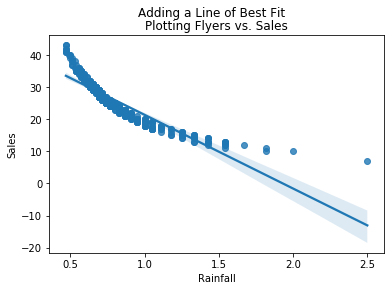

In [29]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Flyers vs. Sales")
sns.regplot(x="Rainfall", y="Sales", data=df)
plt.show()

In [30]:
baseline = df.Sales.mean()

from statsmodels.formula.api import ols

model = ols('Sales ~ Rainfall', df).fit()

# Pre-requisite Part 3 - Calculate residuals
evaluate = pd.DataFrame()

evaluate["x"] = df.Rainfall

# Our y is our dependent variable
evaluate["y"] = df.Sales
evaluate["baseline"] = df.Sales.mean()

# y-hat is shorthand for "predicted y" values
evaluate["yhat"] = model.predict()

# Calculate the baseline residuals 
evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

# Calculate the model residuals
evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,2.00,10,25.323288,-1.599602,15.323288,-11.599602
1,1.33,13,25.323288,13.773142,12.323288,0.773142
2,1.33,15,25.323288,13.773142,10.323288,-1.226858
3,1.05,17,25.323288,20.197573,8.323288,3.197573
4,1.00,18,25.323288,21.344793,7.323288,3.344793


In [31]:
# Calculate if the model beats the baseline
baseline_sse = ((evaluate.baseline_residual**2).sum())
model_sse = ((evaluate.model_residual**2).sum())

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

Our model beats the baseline
It makes sense to evaluate this model more deeply.


In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

metrics = pd.DataFrame()

# Sum the squares of the baseline errors
model_sse = ((evaluate.model_residual**2).sum())

# Take the average of the Sum of squared errors
# mse = model_sse / len(evaluate)

# Or we could calculate this using sklearn's mean_squared_error function
mse = mean_squared_error(evaluate.y, evaluate.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 2998.2371310300655  which is the sum sf squared errors
MSE is 8.21434830419196  which is the average squared error
RMSE is 2.866068440249109  which is the square root of the MSE


In [33]:
# The model commented below is our model
# model = ols('sales ~ flyers', df).fit()

r2 = model.rsquared
print('R-squared = ', round(r2,3))

f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

R-squared =  0.827
p-value for model significance =  3.2988846597381e-140


The rainfall simple model beats the baseline model and the flyer model.

# Log Rainfall

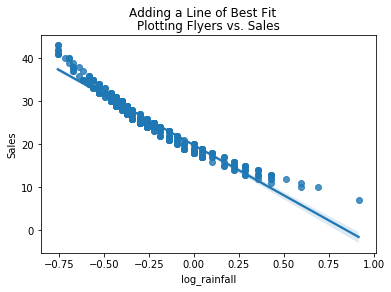

In [35]:
df["log_rainfall"] = np.log(df.Rainfall)

plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Flyers vs. Sales")
sns.regplot(x="log_rainfall", y="Sales", data=df)
plt.show()

In [36]:
baseline = df.Sales.mean()

from statsmodels.formula.api import ols

model = ols('Sales ~ log_rainfall', df).fit()

# Pre-requisite Part 3 - Calculate residuals
evaluate = pd.DataFrame()

evaluate["x"] = df.log_rainfall

# Our y is our dependent variable
evaluate["y"] = df.Sales
evaluate["baseline"] = df.Sales.mean()

# y-hat is shorthand for "predicted y" values
evaluate["yhat"] = model.predict()

# Calculate the baseline residuals 
evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

# Calculate the model residuals
evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,0.693147,10,25.323288,3.688573,15.323288,-6.311427
1,0.285179,13,25.323288,13.198359,12.323288,0.198359
2,0.285179,15,25.323288,13.198359,10.323288,-1.801641
3,0.048790,17,25.323288,18.708608,8.323288,1.708608
4,0.000000,18,25.323288,19.845912,7.323288,1.845912


In [37]:
# Calculate if the model beats the baseline
baseline_sse = ((evaluate.baseline_residual**2).sum())
model_sse = ((evaluate.model_residual**2).sum())

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

Our model beats the baseline
It makes sense to evaluate this model more deeply.


In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt

metrics = pd.DataFrame()

# Sum the squares of the baseline errors
model_sse = ((evaluate.model_residual**2).sum())

# Take the average of the Sum of squared errors
# mse = model_sse / len(evaluate)

# Or we could calculate this using sklearn's mean_squared_error function
mse = mean_squared_error(evaluate.y, evaluate.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 952.3253474293448  which is the sum sf squared errors
MSE is 2.6091105409023143  which is the average squared error
RMSE is 1.6152741380033033  which is the square root of the MSE


In [39]:
# The model commented below is our model
# model = ols('sales ~ flyers', df).fit()

r2 = model.rsquared
print('R-squared = ', round(r2,3))

f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

R-squared =  0.945
p-value for model significance =  1.2242624097795882e-230


So far, the log_rainfall metric is the beset feature to use for our simple model.

# Temperature

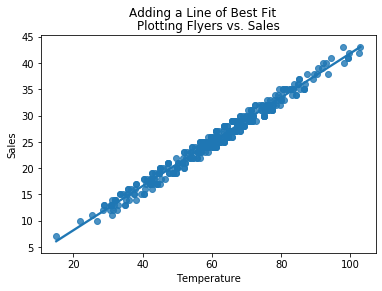

In [41]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Flyers vs. Sales")
sns.regplot(x="Temperature", y="Sales", data=df)
plt.show()

In [42]:
baseline = df.Sales.mean()

from statsmodels.formula.api import ols

model = ols('Sales ~ Temperature', df).fit()

# Pre-requisite Part 3 - Calculate residuals
evaluate = pd.DataFrame()

evaluate["x"] = df.Temperature

# Our y is our dependent variable
evaluate["y"] = df.Sales
evaluate["baseline"] = df.Sales.mean()

# y-hat is shorthand for "predicted y" values
evaluate["yhat"] = model.predict()

# Calculate the baseline residuals 
evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

# Calculate the model residuals
evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,27.0,10,25.323288,11.112301,15.323288,1.112301
1,28.9,13,25.323288,11.912772,12.323288,-1.087228
2,34.5,15,25.323288,14.272055,10.323288,-0.727945
3,44.1,17,25.323288,18.316540,8.323288,1.316540
4,42.4,18,25.323288,17.600329,7.323288,-0.399671


In [43]:
# Calculate if the model beats the baseline
baseline_sse = ((evaluate.baseline_residual**2).sum())
model_sse = ((evaluate.model_residual**2).sum())

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

Our model beats the baseline
It makes sense to evaluate this model more deeply.


In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt

metrics = pd.DataFrame()

# Sum the squares of the baseline errors
model_sse = ((evaluate.model_residual**2).sum())

# Take the average of the Sum of squared errors
# mse = model_sse / len(evaluate)

# Or we could calculate this using sklearn's mean_squared_error function
mse = mean_squared_error(evaluate.y, evaluate.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 349.977815203168  which is the sum sf squared errors
MSE is 0.9588433293237479  which is the average squared error
RMSE is 0.979205458177061  which is the square root of the MSE


In [45]:
# The model commented below is our model
# model = ols('sales ~ flyers', df).fit()

r2 = model.rsquared
print('R-squared = ', round(r2,3))

f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

R-squared =  0.98
p-value for model significance =  1.492364042585725e-309


Temperature is now the best feature to use in our model. 